In [62]:
library(MASS)
library(pvclust)
#library(dendextend)
library(circlize)
library(ggplot2)
library(scatterplot3d)
library(viridis)

Loading required package: viridisLite


In [11]:
dat = read.csv('/Users/lukie/Documents/canlab/NPSSR/npssr_code/multistudy/results/all_contrast_all_signature_scores22-Apr-2021_.csv')
#dat['study'] = as.factor(dat['study'])
dim(dat)
head(dat)

[1] 284  16

NPS_dotproduct_zscoreimages,NPSpos_dotproduct_zscoreimages,NPSneg_dotproduct_zscoreimages,SIIPS_dotproduct_zscoreimages,PINES_dotproduct_zscoreimages,Rejection_dotproduct_zscoreimages,VPS_dotproduct_zscoreimages,VPS_nooccip_dotproduct_zscoreimages,GSR_dotproduct_zscoreimages,Heart_dotproduct_zscoreimages,FM_Multisens_dotproduct_zscoreimages,FM_pain_dotproduct_zscoreimages,Empathic_Care_dotproduct_zscoreimages,Empathic_Dist_dotproduct_zscoreimages,pain_scores,study
-56.23406,-31.09090,2.628119,-4734.67687,0.7656008,-0.5657283,14.950604,20.35018,-0.04853558,0.006158714,-0.05083746,-1.8976822,0.1505683,2.239625,-0.3557435,remi_remi_hot_drug_fx
-26.71696,-18.19040,0.232601,500.28822,0.5342488,0.9745073,21.621388,21.81770,0.03899762,0.076788397,-0.43644594,-1.5231313,-5.5789606,-3.613918,0.3160446,remi_remi_hot_drug_fx
-21.25847,-14.88125,-5.221235,-1375.29228,-2.3873721,1.3691221,-40.355103,-40.93905,0.10370944,0.054798785,0.19349364,1.5116239,-5.0654238,-6.654575,0.3180119,remi_remi_hot_drug_fx
-19.30238,-10.50993,1.351886,-857.54367,-2.6107038,2.6726542,2.972099,20.93799,-0.01325888,-0.002992955,-0.65083286,-0.2475361,0.7835237,-6.129907,-0.3049003,remi_remi_hot_drug_fx
-34.58306,-12.19088,2.666016,17.89926,2.3366874,5.3740224,3.683473,19.56157,-0.05582800,0.034658741,-0.23361026,-0.3330907,-12.0304456,-8.297326,1.0071170,remi_remi_hot_drug_fx
-30.48195,-32.52145,1.346879,-1541.78936,-0.5951025,-2.4062446,-21.396626,-34.14136,-0.01545733,0.074633726,-0.56726042,-0.6843801,-2.0256217,-5.310300,0.1963824,remi_remi_hot_drug_fx


In [75]:
# cols2use = c('NPS_dotproduct_zscoreimages', 'SIIPS_dotproduct_zscoreimages', 'PINES_dotproduct_zscoreimages', 
#             'pain_scores','study')

# no pain scores
cols2use = c('NPS_dotproduct_zscoreimages', 'SIIPS_dotproduct_zscoreimages', 'PINES_dotproduct_zscoreimages', 
            'study')

subdat = dat[cols2use]
head(subdat)

NPS_dotproduct_zscoreimages,SIIPS_dotproduct_zscoreimages,PINES_dotproduct_zscoreimages,study
-56.23406,-4734.67687,0.7656008,remi_remi_hot_drug_fx
-26.71696,500.28822,0.5342488,remi_remi_hot_drug_fx
-21.25847,-1375.29228,-2.3873721,remi_remi_hot_drug_fx
-19.30238,-857.54367,-2.6107038,remi_remi_hot_drug_fx
-34.58306,17.89926,2.3366874,remi_remi_hot_drug_fx
-30.48195,-1541.78936,-0.5951025,remi_remi_hot_drug_fx


In [77]:
euc_dis = dist(subdat[,1:3], method = "euclidean") # distance matrix

In [78]:
# check out single dimensional Nonmetric MDS first
iso =  isoMDS(euc_dis, k=3)
mymds = data.frame(iso$points)
mymds = cbind(mymds, subdat['study'])

initial  value 0.000000 
final  value 0.000000 
converged


In [79]:
head(mymds)

X1,X2,X3,study
4814.32470,-31.75659,0.6992009,remi_remi_hot_drug_fx
-420.72342,-30.33826,0.6404274,remi_remi_hot_drug_fx
1454.80066,-14.81680,-2.3643736,remi_remi_hot_drug_fx
937.04900,-15.63999,-2.5693542,remi_remi_hot_drug_fx
61.70087,-35.61268,2.4338147,remi_remi_hot_drug_fx
1621.34491,-23.14410,-0.5665622,remi_remi_hot_drug_fx


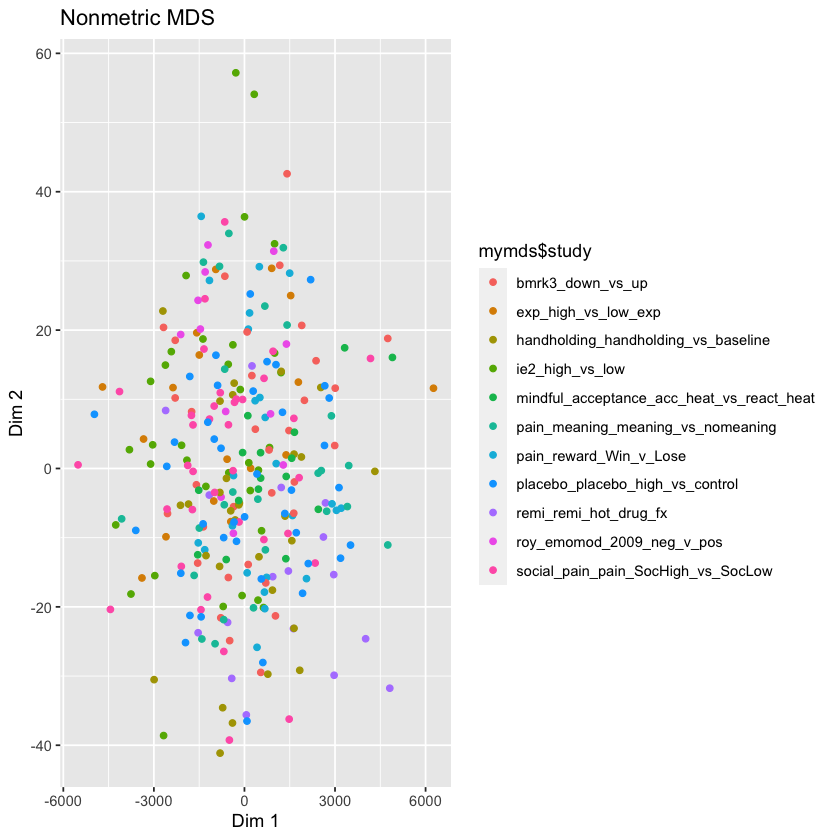

In [80]:
# plot 
require(ggplot2)
qplot(mymds$X1, mymds$X2, xlab="Dim 1", ylab="Dim 2", main="Nonmetric MDS", color = mymds$study)

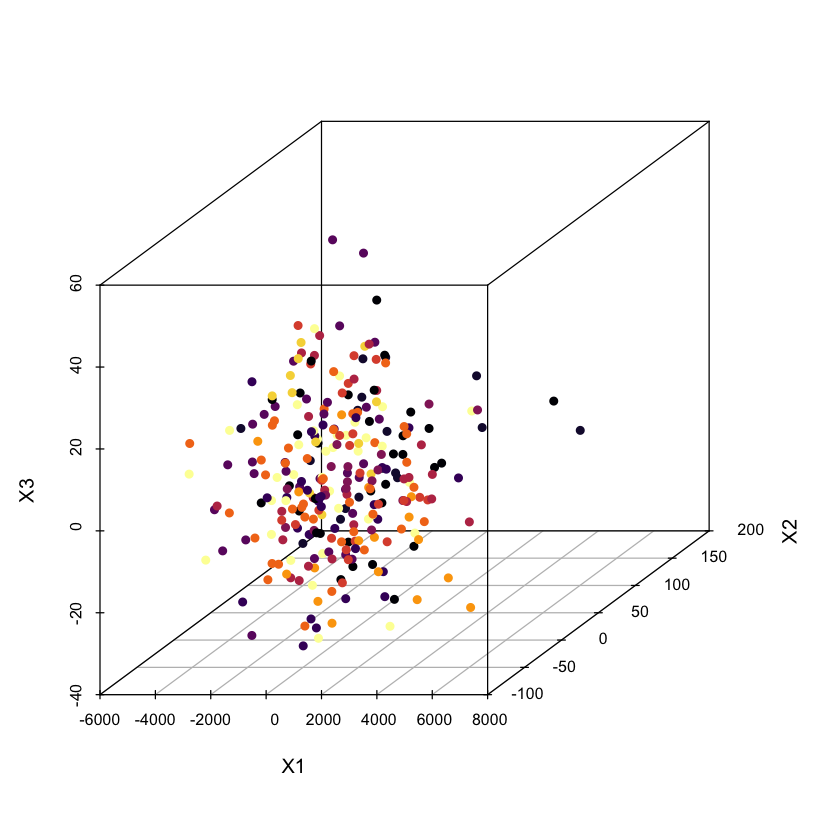

In [74]:
colors <- inferno(11)
colors <- colors[as.numeric(mymds$study)]
scatterplot3d(mymds[,1:3], pch=16,  color = colors, angle=30 )

In [63]:
inferno(10)

[1] "#000004FF" "#1B0C42FF" "#4B0C6BFF" "#781C6DFF" "#A52C60FF" "#CF4446FF"
 [7] "#ED6925FF" "#FB9A06FF" "#F7D03CFF" "#FCFFA4FF"